# Demonstrating Seaborn Modin Interoperability

### All the examples in this section are taken / adapted from https://seaborn.pydata.org/tutorial/introduction.html. Each visualization is created with a Modin and then pandas dataframe for comparison.

In [1]:
import seaborn as sns


import modin.pandas as pd
import snowflake.snowpark.modin.plugin
import numpy as np
from snowflake.snowpark.session import Session; session = Session.builder.create()


In [3]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
pandas_tips = sns.load_dataset("tips").astype('string')
modin_tips = pd.DataFrame(pandas_tips)

type(modin_tips)

modin.pandas.dataframe.DataFrame

In [4]:
modin_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


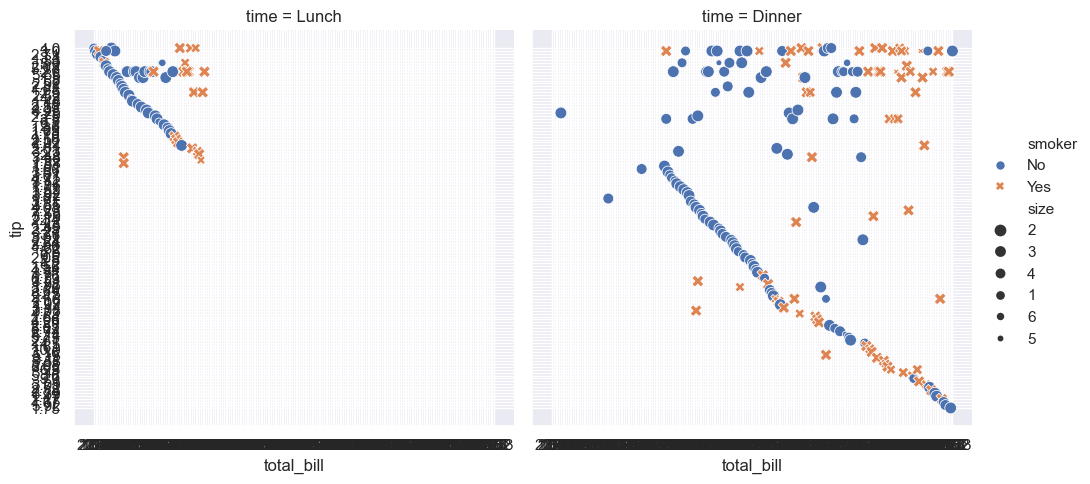

In [5]:
# Create a visualization with Modin df
sns.relplot(
    data=modin_tips,
    x="total_bill", y="tip", col="time", col_order=["Lunch", "Dinner"],
    hue="smoker", style="smoker", size="size",
)

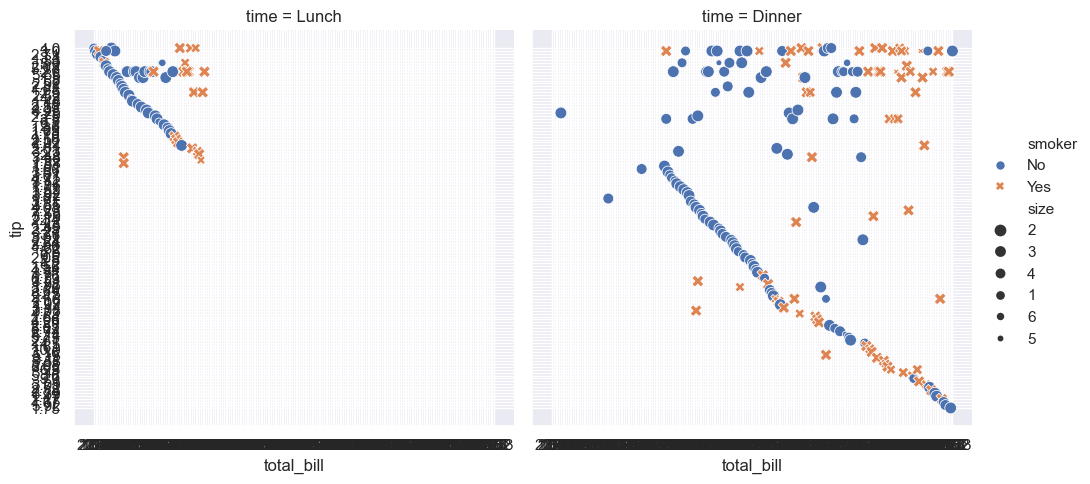

In [6]:
# Create a visualization with pandas df
sns.relplot(
    data=pandas_tips,
    x="total_bill", y="tip", col="time", col_order=["Lunch", "Dinner"],
    hue="smoker", style="smoker", size="size",
)

<Axes: xlabel='total_bill', ylabel='tip'>

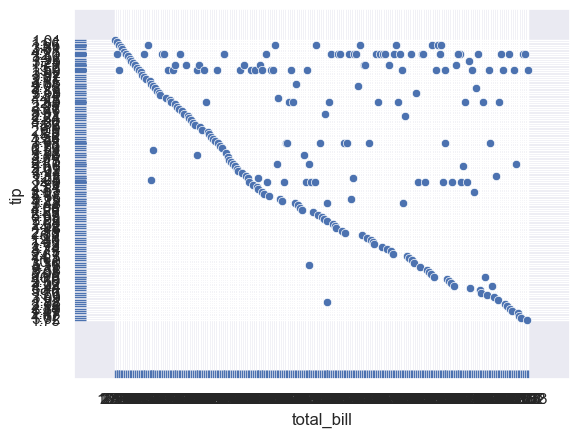

In [7]:
# Create a visualization with Modin df
sns.scatterplot(data=modin_tips, x="total_bill", y="tip")
sns.rugplot(data=modin_tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

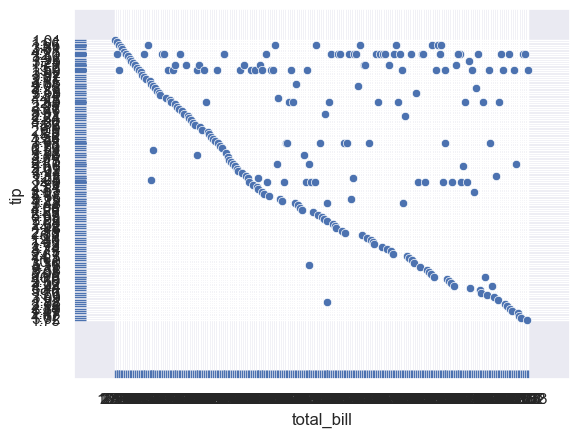

In [8]:
# Create a visualization with pandas df
sns.scatterplot(data=pandas_tips, x="total_bill", y="tip")
sns.rugplot(data=pandas_tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

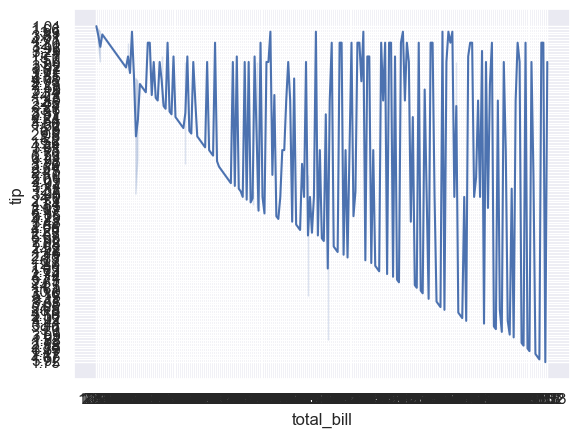

In [9]:
# Create a visualization with Modin df
sns.lineplot(data=modin_tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

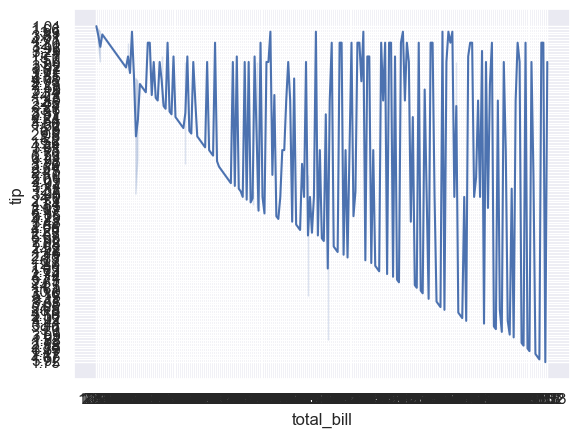

In [10]:
# Create a visualization with pandas df
sns.lineplot(data=pandas_tips, x="total_bill", y="tip")

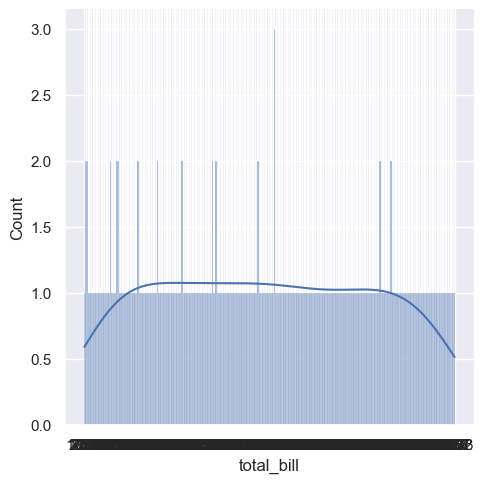

In [11]:
# Create a visualization with Modin df
sns.displot(data=modin_tips, x="total_bill", kde=True)

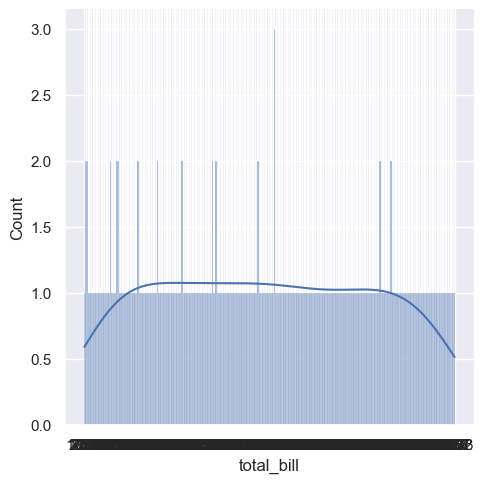

In [12]:
# Create a visualization with pandas df
sns.displot(data=pandas_tips, x="total_bill", kde=True)

<Axes: xlabel='total_bill', ylabel='Frequency'>

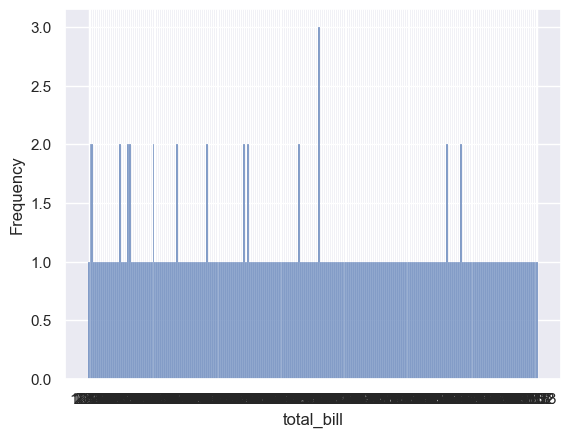

In [13]:
# Create a visualization with Modin df
sns.histplot(data=modin_tips, x="total_bill", stat='frequency')

<Axes: xlabel='total_bill', ylabel='Frequency'>

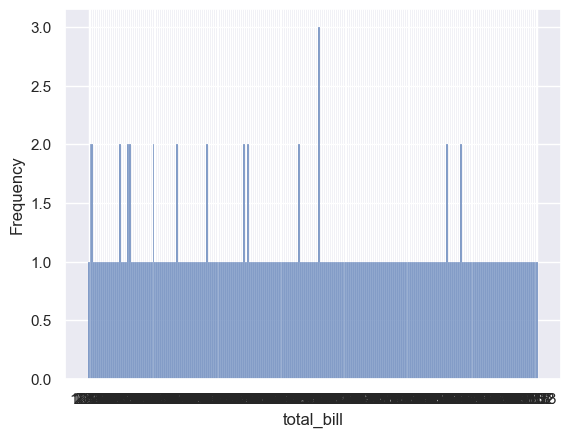

In [14]:
# Create a visualization with pandas df
sns.histplot(data=pandas_tips, x="total_bill", stat='frequency')

In [15]:
# Create a visualization with Modin df
sns.residplot(data=modin_tips, x="total_bill", y="tip")

TypeError: no implementation found for 'numpy.squeeze' on types that implement __array_function__: [<class 'modin.pandas.series.Series'>]

TypeError: loop of ufunc does not support argument 1 of type str which has no callable conjugate method

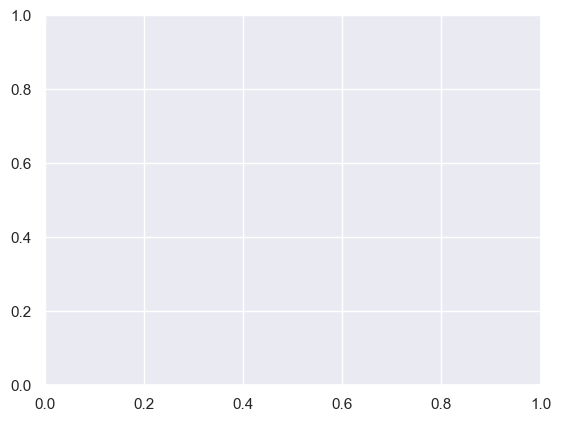

In [16]:
# Create a visualization with pandas df
sns.residplot(data=pandas_tips, x="total_bill", y="tip")

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

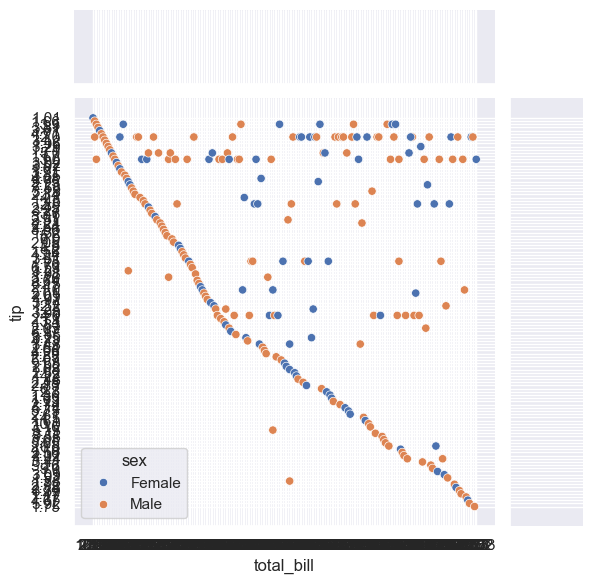

In [19]:
# Create a visualization with Modin df 
sns.jointplot(data=modin_tips, x="total_bill", y="tip", hue="sex", hue_order=["Female", "Male"])

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

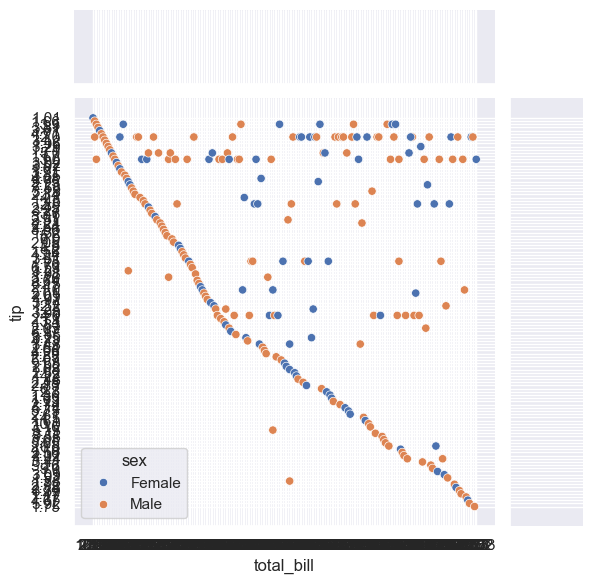

In [18]:
# Create a visualization with pandas df
sns.jointplot(data=pandas_tips, x="total_bill", y="tip", hue="sex", hue_order=["Female", "Male"])